# importing the necessary paython libraries and dataset

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('DatafinitiElectronicsProductData.csv', error_bad_lines=False)
df=df.drop(['manufacturer'], axis=1)
df=df.drop(['ean'], axis=1)
df.head()

C:\Users\safaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,product_id,asins,brand,categories,dateAdded,dateUpdated,keys,manufacturerNumber,name,upc,weight,text_reviews_count,ratings_count,avarage_rate,id
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,microsoftsurfacepro4typecoverwithfingerprintid...,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,8.900000e+11,17.60,17,17,4.5,123
1,AVpgMuGwLJeJML43KY_c,"B018K251JE,B00VILQKQ8",Boytone,"Electronics,Portable Audio & Video,Home Audio ...",2015-05-18T14:14:56Z,2018-02-12T16:29:05Z,boytone2500w21chhometheatersystemblackdiamond/...,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,6.420000e+11,232.80,149,149,4.6,654
2,AVphzgbJLJeJML43fA0o,B00C78VIUE,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13T12:00:51Z,2018-05-12T18:59:48Z,sanusvlf410b110inchsuperslimfullmotionmountfor...,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,7.940000e+11,524.80,114,114,4.8,456
3,AWIm0C3TYSSHbkXwx3S6,B075WKS4D8,Ultimate Ears,"Portable Bluetooth Speakers,Bluetooth & Wirele...",2018-03-14T20:42:16Z,2018-05-29T17:19:12Z,ultimateearsmegablastsmartportablewifibluetoot...,984-000911,Ultimate Ears MEGABLAST Portable Wi-Fi/Bluetoo...,9.785513e+10,60.80,6,6,5.0,789
4,AVpfnp8HLJeJML43AmVi,B000YA33DC,Lowepro,"Photography,Photography Bags Cases,Camera Bags...",2015-08-18T18:38:58Z,2018-01-29T07:34:55Z,"flipside300backpackblack/1446571,056035351853,...",LP35185,Flipside 300 Backpack (Black),5.603535e+10,45.92,340,340,4.4,987


# Data Exploration


In [156]:
df.isnull().sum()


product_id            0
asins                 0
brand                 0
categories            0
dateAdded             0
dateUpdated           0
keys                  0
manufacturerNumber    0
name                  0
upc                   0
weight                0
text_reviews_count    0
ratings_count         0
avarage_rate          0
id                    0
dtype: int64

In [157]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          50 non-null     object 
 1   asins               50 non-null     object 
 2   brand               50 non-null     object 
 3   categories          50 non-null     object 
 4   dateAdded           50 non-null     object 
 5   dateUpdated         50 non-null     object 
 6   keys                50 non-null     object 
 7   manufacturerNumber  50 non-null     object 
 8   name                50 non-null     object 
 9   upc                 50 non-null     float64
 10  weight              50 non-null     float64
 11  text_reviews_count  50 non-null     int64  
 12  ratings_count       50 non-null     int64  
 13  avarage_rate        50 non-null     float64
 14  id                  50 non-null     int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ KB


In [158]:
df.describe()


,upc,weight,text_reviews_count,ratings_count,avarage_rate,id
count,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000
mean,4.735226e+11,87.909040,145.88000,142.700000,4.526000,527.580000
std,3.728254e+11,115.562662,240.72108,240.856232,0.323129,304.831575
min,1.781766e+10,0.800000,1.00000,1.000000,3.500000,110.000000
25%,4.701178e+10,13.800000,38.25000,28.500000,4.300000,222.500000
50%,7.110000e+11,33.840000,98.50000,93.500000,4.500000,549.500000
75%,7.937500e+11,110.000000,152.75000,149.000000,4.800000,776.500000
max,8.900000e+11,524.800000,1604.00000,1604.000000,5.000000,999.000000


<AxesSubplot:xlabel='avarage_rate', ylabel='name'>

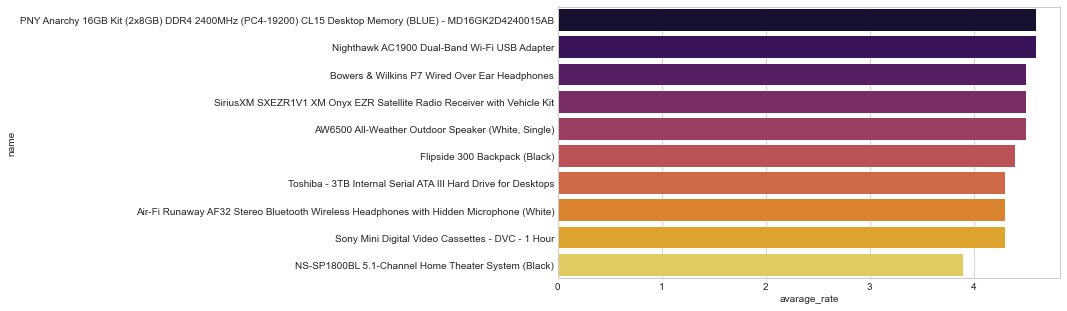

In [159]:
top_ten=df[df['ratings_count']>100]
top_ten=top_ten.sort_values(by='ratings_count', ascending=False).head(10)
top_ten_rating=top_ten.sort_values(by='avarage_rate', ascending=False)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,5))
sns.barplot(x="avarage_rate", y="name", data=top_ten_rating, palette='inferno')

In [160]:
ele_b=df.groupby('brand')['name'].count().reset_index().sort_values('name', ascending=False).head(10).set_index('brand')


In [161]:
ele_b

,name
brand,
Sony,6
Yamaha,3
House of Marley,2
Logitech,2
Toshiba,2
Samsung,2
JBL,2
Peerless-AV,1
Pny,1


C:\Users\safaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


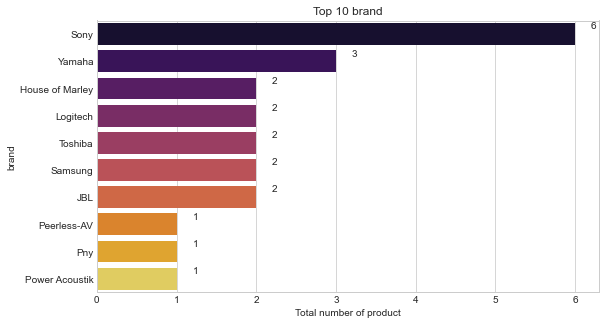

In [162]:
plt.figure(figsize=(9,5))

ax=sns.barplot(ele_b['name'], ele_b.index, palette='inferno')
ax.set_title("Top 10 brand")
ax.set_xlabel("Total number of product")

total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))

plt.show()

In [163]:
most_rated=df.sort_values('ratings_count', ascending = False).head(10).set_index('name')


C:\Users\safaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


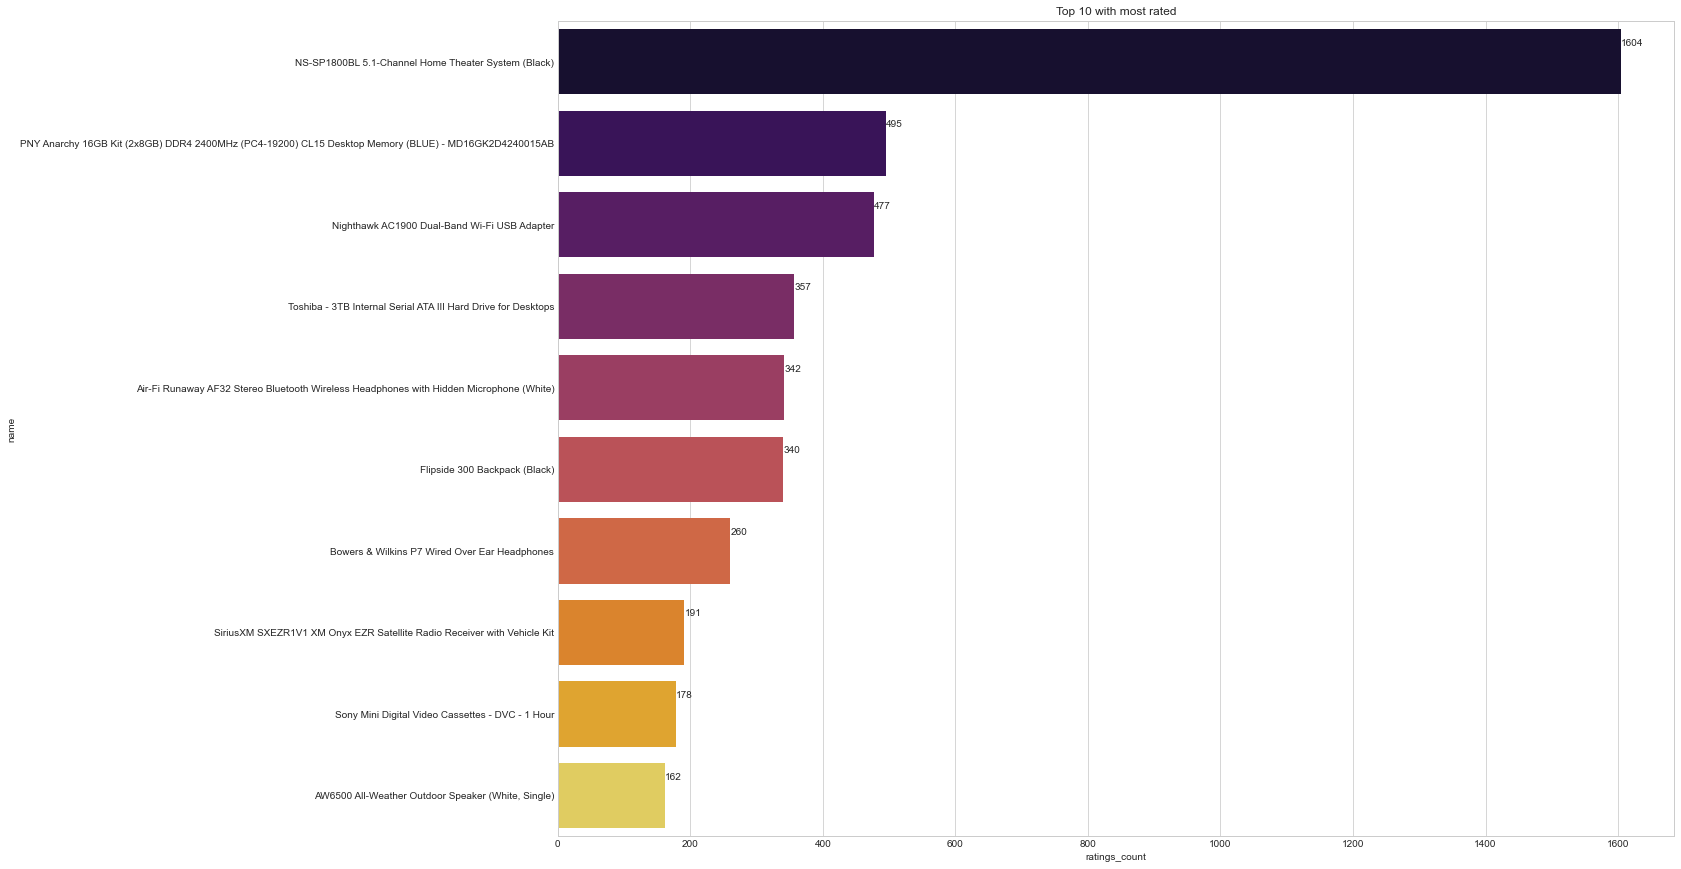

In [164]:
plt.figure(figsize=(20,15))

ax=sns.barplot(most_rated['ratings_count'], most_rated.index, palette='inferno')
ax.set_title("Top 10 with most rated")


total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))

plt.show()

In [165]:
df=df.sort_values('avarage_rate').reset_index()
df=df.iloc[4:]
df
#drop=True

,index,product_id,asins,brand,categories,dateAdded,dateUpdated,keys,manufacturerNumber,name,upc,weight,text_reviews_count,ratings_count,avarage_rate,id
4,43,AVpe5iL11cnluZ0-ZVzB,B00L2EWRW2,Kicker,"Electronics,Home Audio & Theater,Home Audio,Al...",2015-09-11T01:06:05Z,2018-01-08T19:08:30Z,kicker41ik5bt2v2amphitheaterhighperformanceaud...,41IK5BT2V2,Kicker 41IK5BT2V2 Amphitheater High-Performanc...,7.130000e+11,220.800,69,69,4.1,113
5,18,AV13V_i2glJLPUi8PFgb,B009E6J1BU,Toshiba,"Internal Solid State Drives,Computers & Access...",2017-07-25T01:24:00Z,2018-06-01T19:31:33Z,toshiba3tbinternalserialataiiiharddrivefordesk...,PH3300U-1I72,Toshiba - 3TB Internal Serial ATA III Hard Dri...,2.226528e+10,2.000,357,357,4.3,879
6,25,AVpftC_FLJeJML43CLs8,B008FH1PJA,MEE audio,"Headphones,Bluetooth Headphones,All Headphones...",2015-08-18T18:41:22Z,2018-05-25T00:15:08Z,meelectronicsairfirunawaybluetoothwirelessonea...,HP-AF32-GW-MEE,Air-Fi Runaway AF32 Stereo Bluetooth Wireless ...,7.360000e+11,3.880,342,342,4.3,189
7,16,AVpfjP9uilAPnD_xdy6-,B007QOIP3M,Sony,"Electronics,Computers,Computer Accessories,Bla...",2015-11-16T02:04:10Z,2018-04-07T05:41:45Z,"sony/dvm60prr6c,sonyminidigitalvideocassettesd...",DVM60PRR6C,Sony Mini Digital Video Cassettes - DVC - 1 Hour,2.724227e+10,6.200,178,178,4.3,213
8,26,AV4GShTMvKc47QAVrFsX,B071ZVQVFQ,Samsung,"LED & LCD TVs,All TVs,Refurbished TVs,TV & Vid...",2017-08-21T19:34:31Z,2018-06-05T22:34:48Z,"841434197719,samsung40classfhd1080psmartledtvu...",UN40M5300AFXZA,SAMSUNG 40'' Class FHD (1080P) Smart LED TV (U...,8.870000e+11,246.400,154,154,4.3,146
9,13,AVpg8i6NilAPnD_xzQdN,"B01LYGPB3J,B011QHAOWO",Sling Media,"TV & Video,Media Streaming Players,New Technol...",2015-09-30T18:03:06Z,2018-05-28T23:53:50Z,"slingboxm2/slm2,slingboxm2/b011qhaowo,75396001...",SB375-100,Slingbox M2,7.540000e+11,28.800,65,66,4.3,753
10,49,AVpe8ZRY1cnluZ0-aY4H,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,"peerlessav/acc570,roundlcdprojectorceilingplat...",ACC570,Round LCD/Projector Ceiling Plate - Black,7.350000e+11,19.200,100,100,4.3,883
11,7,AVpiUMISilAPnD_xC-hu,"B0172DS3ME,B00NTJKAXG",Verizon Wireless,"Computers,Networking,Home Networking & Connect...",2015-10-20T18:34:01Z,2018-05-16T20:24:20Z,verizonmifi6620ljetpack4gltemobilehotspotveriz...,Mifi6620L,Verizon MiFi 6620L Jetpack 4G LTE Mobile Hotsp...,6.490000e+11,14.400,4,4,4.3,147
12,6,AVpgF1BOilAPnD_xnTsK,B00WBS31OQ,"Sdi Technologies, Inc.","Portable Bluetooth Speakers,Stereos,Computers,...",2016-11-07T00:18:57Z,2018-05-28T23:48:06Z,"047532907711,ihomerechargeablesplashproofstere...",IBT33BC,iHome Rechargeable Splash Proof Stereo Bluetoo...,4.753291e+10,12.500,127,114,4.3,714
13,42,AV2Zps11GV-KLJ3al16A,B0742RMVQ8,Toshiba,"Home Theater Systems,Portable Audio & Video,El...",2017-07-31T17:17:11Z,2018-05-29T17:19:20Z,toshiba30wmainunitspeakersystemcombosetblack/5...,TY-ASW91,Toshiba Micro Component Speaker System: Wirele...,8.190000e+11,163.200,3,3,4.3,224


C:\Users\safaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'avarage rate')

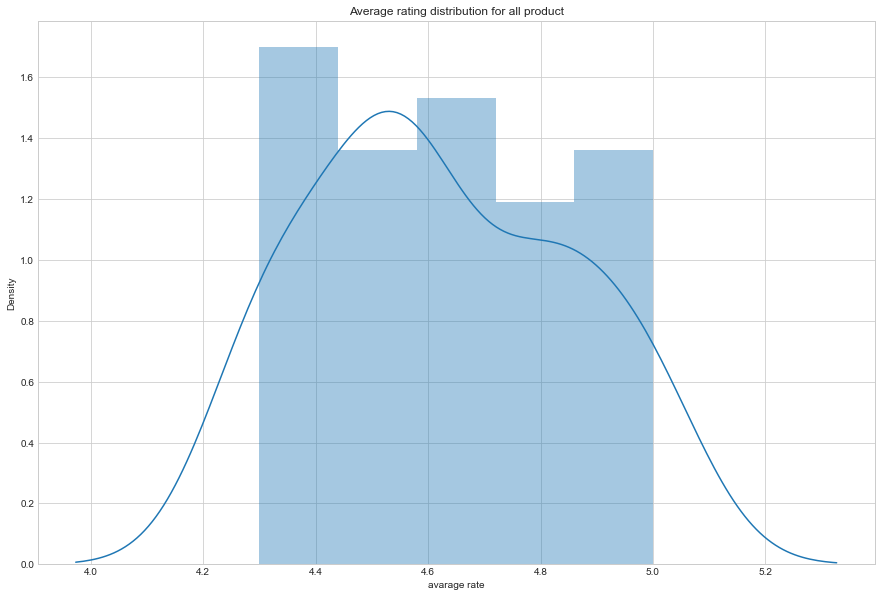

In [148]:
df.avarage_rate=df.avarage_rate.astype(float)
fig, ax= plt.subplots(figsize=[15,10])

sns.distplot(df['avarage_rate'], ax=ax)
ax.set_title('Average rating distribution for all product')
ax.set_xlabel('avarage rate')

In [150]:
df.tail(50)


,index,product_id,asins,brand,categories,dateAdded,dateUpdated,keys,manufacturerNumber,name,upc,weight,text_reviews_count,ratings_count,avarage_rate,id
4,4,AV4GShTMvKc47QAVrFsX,B071ZVQVFQ,Samsung,"LED & LCD TVs,All TVs,Refurbished TVs,TV & Vid...",2017-08-21T19:34:31Z,2018-06-05T22:34:48Z,"841434197719,samsung40classfhd1080psmartledtvu...",UN40M5300AFXZA,SAMSUNG 40'' Class FHD (1080P) Smart LED TV (U...,8.870000e+11,246.400,154,154,4.3,146
5,5,AVpg8i6NilAPnD_xzQdN,"B01LYGPB3J,B011QHAOWO",Sling Media,"TV & Video,Media Streaming Players,New Technol...",2015-09-30T18:03:06Z,2018-05-28T23:53:50Z,"slingboxm2/slm2,slingboxm2/b011qhaowo,75396001...",SB375-100,Slingbox M2,7.540000e+11,28.800,65,66,4.3,753
6,6,AVpe8ZRY1cnluZ0-aY4H,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,"peerlessav/acc570,roundlcdprojectorceilingplat...",ACC570,Round LCD/Projector Ceiling Plate - Black,7.350000e+11,19.200,100,100,4.3,883
7,7,AVpiUMISilAPnD_xC-hu,"B0172DS3ME,B00NTJKAXG",Verizon Wireless,"Computers,Networking,Home Networking & Connect...",2015-10-20T18:34:01Z,2018-05-16T20:24:20Z,verizonmifi6620ljetpack4gltemobilehotspotveriz...,Mifi6620L,Verizon MiFi 6620L Jetpack 4G LTE Mobile Hotsp...,6.490000e+11,14.400,4,4,4.3,147
8,8,AVpgF1BOilAPnD_xnTsK,B00WBS31OQ,"Sdi Technologies, Inc.","Portable Bluetooth Speakers,Stereos,Computers,...",2016-11-07T00:18:57Z,2018-05-28T23:48:06Z,"047532907711,ihomerechargeablesplashproofstere...",IBT33BC,iHome Rechargeable Splash Proof Stereo Bluetoo...,4.753291e+10,12.500,127,114,4.3,714
9,9,AV2Zps11GV-KLJ3al16A,B0742RMVQ8,Toshiba,"Home Theater Systems,Portable Audio & Video,El...",2017-07-31T17:17:11Z,2018-05-29T17:19:20Z,toshiba30wmainunitspeakersystemcombosetblack/5...,TY-ASW91,Toshiba Micro Component Speaker System: Wirele...,8.190000e+11,163.200,3,3,4.3,224
10,10,AVpgfP3DilAPnD_xtG3M,B00IAKLM54,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",2015-05-18T12:55:52Z,2018-03-23T17:22:18Z,"logitech/915000224,logitech915000224harmonyult...",915-000224,Logitech 915-000224 Harmony Ultimate One 15-D...,9.785510e+10,27.200,90,90,4.3,114
11,13,AVpg8GjjLJeJML43Uplr,B00RZYD51A,House of Marley,"Headphones,Electronics,Over-Ear Headphones,Aud...",2015-09-11T00:49:09Z,2018-05-29T17:18:33Z,"846885005156,houseofmarleyemdh003psttrnoisecan...",EM-DH003-PS,House of Marley EM-DH003-PS TTR Noise-Cancelli...,8.470000e+11,44.800,148,140,4.4,775
12,12,AVpfnp8HLJeJML43AmVi,B000YA33DC,Lowepro,"Photography,Photography Bags Cases,Camera Bags...",2015-08-18T18:38:58Z,2018-01-29T07:34:55Z,"flipside300backpackblack/1446571,056035351853,...",LP35185,Flipside 300 Backpack (Black),5.603535e+10,45.920,340,340,4.4,987
13,11,AVpiEA1f1cnluZ0-JaoG,B00B7C07LC,Power Acoustik,"Auto & Tires,Auto Electronics,Car Speakers and...",2015-12-02T11:10:54Z,2018-05-02T14:25:22Z,poweracoustikgothicseries10dualvoicecoil2ohmsu...,GW3-10,"Power Acoustik - Gothic Series 10"" Dual-Voice-...",7.090000e+11,292.800,160,155,4.4,153


<Figure size 1440x1440 with 0 Axes>

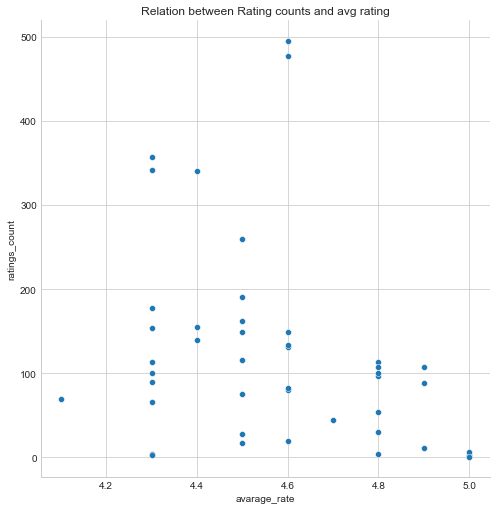

In [94]:
plt.figure(figsize=(20,20))
ax=sns.relplot(data=df, x="avarage_rate", y="ratings_count",sizes=(400,200), height=7)
plt.title('Relation between Rating counts and avg rating')
ax.set_axis_labels("avarage_rate", "ratings_count")

In [169]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 4 to 45
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   level_0             42 non-null     int64  
 1   index               42 non-null     int64  
 2   product_id          42 non-null     object 
 3   asins               42 non-null     object 
 4   brand               42 non-null     object 
 5   categories          42 non-null     object 
 6   dateAdded           42 non-null     object 
 7   dateUpdated         42 non-null     object 
 8   keys                42 non-null     object 
 9   manufacturerNumber  42 non-null     object 
 10  name                42 non-null     object 
 11  upc                 42 non-null     float64
 12  weight              42 non-null     float64
 13  text_reviews_count  42 non-null     int64  
 14  ratings_count       42 non-null     int64  
 15  avarage_rate        42 non-null     float64
 16  id        

In [170]:
df.weight=df.weight.astype(float)
  


In [171]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 4 to 45
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   level_0             42 non-null     int64  
 1   index               42 non-null     int64  
 2   product_id          42 non-null     object 
 3   asins               42 non-null     object 
 4   brand               42 non-null     object 
 5   categories          42 non-null     object 
 6   dateAdded           42 non-null     object 
 7   dateUpdated         42 non-null     object 
 8   keys                42 non-null     object 
 9   manufacturerNumber  42 non-null     object 
 10  name                42 non-null     object 
 11  upc                 42 non-null     float64
 12  weight              42 non-null     float64
 13  text_reviews_count  42 non-null     int64  
 14  ratings_count       42 non-null     int64  
 15  avarage_rate        42 non-null     float64
 16  id        

<Figure size 648x360 with 0 Axes>

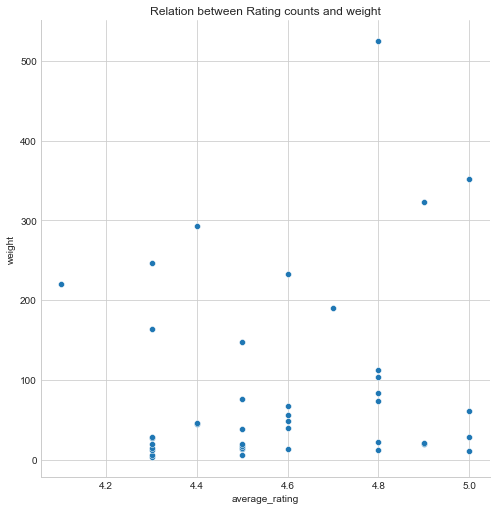

In [172]:
plt.figure(figsize=(9,5))
ax=sns.relplot( x="avarage_rate", y="weight",data=df,sizes=(200,200), height=7)
plt.title('Relation between Rating counts and weight')
ax.set_axis_labels("average_rating", "weight")

# Data Preparation


In [173]:
df2=df.copy()


In [174]:
df2.loc[(df2['avarage_rate']>=0)&(df2['avarage_rate']<=1),'rating between']="between 0 and 1"
df2.loc[(df2['avarage_rate']>1)&(df2['avarage_rate']<=2),'rating between']="between 1 and 2"
df2.loc[(df2['avarage_rate']>2)&(df2['avarage_rate']<=3),'rating between']="between 2 and 3"
df2.loc[(df2['avarage_rate']>3)&(df2['avarage_rate']<=4),'rating between']="between 3 and 4"
df2.loc[(df2['avarage_rate']>4)&(df2['avarage_rate']<=5),'rating between']="between 4 and 5"

In [175]:
df2.sort_values('avarage_rate')


,level_0,index,product_id,asins,brand,categories,dateAdded,dateUpdated,keys,manufacturerNumber,name,upc,weight,text_reviews_count,ratings_count,avarage_rate,id,rating between
39,4,43,AVpe5iL11cnluZ0-ZVzB,B00L2EWRW2,Kicker,"Electronics,Home Audio & Theater,Home Audio,Al...",2015-09-11T01:06:05Z,2018-01-08T19:08:30Z,kicker41ik5bt2v2amphitheaterhighperformanceaud...,41IK5BT2V2,Kicker 41IK5BT2V2 Amphitheater High-Performanc...,7.130000e+11,220.80,69,69,4.1,113,between 4 and 5
22,9,13,AVpg8i6NilAPnD_xzQdN,"B01LYGPB3J,B011QHAOWO",Sling Media,"TV & Video,Media Streaming Players,New Technol...",2015-09-30T18:03:06Z,2018-05-28T23:53:50Z,"slingboxm2/slm2,slingboxm2/b011qhaowo,75396001...",SB375-100,Slingbox M2,7.540000e+11,28.80,65,66,4.3,753,between 4 and 5
20,14,48,AVpgfP3DilAPnD_xtG3M,B00IAKLM54,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",2015-05-18T12:55:52Z,2018-03-23T17:22:18Z,"logitech/915000224,logitech915000224harmonyult...",915-000224,Logitech 915-000224 Harmony Ultimate One 15-D...,9.785510e+10,27.20,90,90,4.3,114,between 4 and 5
37,13,42,AV2Zps11GV-KLJ3al16A,B0742RMVQ8,Toshiba,"Home Theater Systems,Portable Audio & Video,El...",2017-07-31T17:17:11Z,2018-05-29T17:19:20Z,toshiba30wmainunitspeakersystemcombosetblack/5...,TY-ASW91,Toshiba Micro Component Speaker System: Wirele...,8.190000e+11,163.20,3,3,4.3,224,between 4 and 5
16,10,49,AVpe8ZRY1cnluZ0-aY4H,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,"peerlessav/acc570,roundlcdprojectorceilingplat...",ACC570,Round LCD/Projector Ceiling Plate - Black,7.350000e+11,19.20,100,100,4.3,883,between 4 and 5
12,11,7,AVpiUMISilAPnD_xC-hu,"B0172DS3ME,B00NTJKAXG",Verizon Wireless,"Computers,Networking,Home Networking & Connect...",2015-10-20T18:34:01Z,2018-05-16T20:24:20Z,verizonmifi6620ljetpack4gltemobilehotspotveriz...,Mifi6620L,Verizon MiFi 6620L Jetpack 4G LTE Mobile Hotsp...,6.490000e+11,14.40,4,4,4.3,147,between 4 and 5
4,6,25,AVpftC_FLJeJML43CLs8,B008FH1PJA,MEE audio,"Headphones,Bluetooth Headphones,All Headphones...",2015-08-18T18:41:22Z,2018-05-25T00:15:08Z,meelectronicsairfirunawaybluetoothwirelessonea...,HP-AF32-GW-MEE,Air-Fi Runaway AF32 Stereo Bluetooth Wireless ...,7.360000e+11,3.88,342,342,4.3,189,between 4 and 5
41,8,26,AV4GShTMvKc47QAVrFsX,B071ZVQVFQ,Samsung,"LED & LCD TVs,All TVs,Refurbished TVs,TV & Vid...",2017-08-21T19:34:31Z,2018-06-05T22:34:48Z,"841434197719,samsung40classfhd1080psmartledtvu...",UN40M5300AFXZA,SAMSUNG 40'' Class FHD (1080P) Smart LED TV (U...,8.870000e+11,246.40,154,154,4.3,146,between 4 and 5
8,12,6,AVpgF1BOilAPnD_xnTsK,B00WBS31OQ,"Sdi Technologies, Inc.","Portable Bluetooth Speakers,Stereos,Computers,...",2016-11-07T00:18:57Z,2018-05-28T23:48:06Z,"047532907711,ihomerechargeablesplashproofstere...",IBT33BC,iHome Rechargeable Splash Proof Stereo Bluetoo...,4.753291e+10,12.50,127,114,4.3,714,between 4 and 5
6,7,16,AVpfjP9uilAPnD_xdy6-,B007QOIP3M,Sony,"Electronics,Computers,Computer Accessories,Bla...",2015-11-16T02:04:10Z,2018-04-07T05:41:45Z,"sony/dvm60prr6c,sonyminidigitalvideocassettesd...",DVM60PRR6C,Sony Mini Digital Video Cassettes - DVC - 1 Hour,2.724227e+10,6.20,178,178,4.3,213,between 4 and 5


In [177]:
rating_df=pd.get_dummies(df2['rating between'])
asins_df=pd.get_dummies(df2['asins'])


In [178]:
asins_df

,B00009WCBT,B000O3TFWW,B000YA33DC,"B00170HCOO,B001BBT7RY,B00170O1HK",B0038NMC8O,B004OVE61U,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",B005YXXS4I,B007QOIP3M,B008FH1PJA,...,B01CEAT9ZU,B01ETTL6LE,"B01J0BFAAO,B019Q88VAM","B01LYGPB3J,B011QHAOWO","B01MUG578I,B072MP2CFG",B06XSGYCHC,B06XVDYHQX,B071ZVQVFQ,B0742RMVQ8,B075WKS4D8
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
feature=pd.concat([rating_df, asins_df, df2['avarage_rate'], df2['ratings_count']], axis=1)




In [180]:
feature

,between 4 and 5,B00009WCBT,B000O3TFWW,B000YA33DC,"B00170HCOO,B001BBT7RY,B00170O1HK",B0038NMC8O,B004OVE61U,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",B005YXXS4I,B007QOIP3M,...,"B01J0BFAAO,B019Q88VAM","B01LYGPB3J,B011QHAOWO","B01MUG578I,B072MP2CFG",B06XSGYCHC,B06XVDYHQX,B071ZVQVFQ,B0742RMVQ8,B075WKS4D8,avarage_rate,ratings_count
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.3,342
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,116
6,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.3,178
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,2
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.3,114
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.8,4
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,28
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.6,83
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.3,4
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,149


# Building Book Recommendation System


In [181]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

feature=minmax.fit_transform(feature)


In [182]:
feature

array([[0.        , 0.        , 0.        , ..., 0.        , 0.22222222,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.44444444,
        0.3372434 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.22222222,
        0.51906158],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.88888889,
        0.31378299],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.77777778,
        0.3313783 ]])

In [183]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

model=neighbors.NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

model.fit(feature)

dist, idlist=model.kneighbors(feature)

In [184]:
dist

array([[0.        , 1.41858383, 1.45162259, 1.49375425, 1.49848859],
       [0.        , 1.41752081, 1.41925355, 1.41931545, 1.41955346],
       [0.        , 1.41596381, 1.42017429, 1.42294198, 1.42661313],
       [0.        , 1.4142166 , 1.4142166 , 1.41426221, 1.41881721],
       [0.        , 1.41480938, 1.41596381, 1.41907004, 1.4206193 ],
       [0.        , 1.41626745, 1.41872022, 1.42179452, 1.42341331],
       [0.        , 1.41458142, 1.41876569, 1.42091417, 1.42674444],
       [0.        , 1.41424093, 1.41876569, 1.42120163, 1.42186881],
       [0.        , 1.4142166 , 1.42585338, 1.43207405, 1.43329558],
       [0.        , 1.41472732, 1.41752081, 1.4185717 , 1.41868082],
       [0.        , 1.41458142, 1.41859898, 1.42440511, 1.43055182],
       [0.        , 1.41864748, 1.41872022, 1.41881721, 1.41887479],
       [0.        , 1.41451758, 1.41480938, 1.41772403, 1.42305207],
       [0.        , 1.41676832, 1.41956689, 1.42249467, 1.42390864],
       [0.        , 1.41542924, 1.

In [185]:
idlist

array([[ 0, 22, 19,  2, 13],
       [ 1,  9, 24, 28, 20],
       [ 2, 37, 38, 21,  4],
       [ 3, 40, 17, 25, 11],
       [ 4, 12, 16, 37, 21],
       [ 5, 31, 11, 30, 34],
       [ 6, 10, 26, 28, 23],
       [ 7, 23, 28, 24,  1],
       [ 8, 33, 18, 10,  6],
       [ 9, 32,  1, 36, 38],
       [10,  6, 26, 28, 23],
       [11, 25,  5,  3, 17],
       [12, 16,  4, 18, 37],
       [13, 32,  9, 38, 36],
       [14, 39, 27, 15, 29],
       [15, 27, 29, 41, 39],
       [16, 12,  4, 18, 21],
       [17, 40,  3, 25, 11],
       [18, 16, 12,  4,  8],
       [19, 13, 22, 32,  9],
       [20, 24, 36,  9,  1],
       [21, 38,  9, 37, 32],
       [22,  0, 19, 13,  2],
       [23,  7, 28, 24,  1],
       [24, 20, 36,  1,  9],
       [25,  3, 17, 40, 11],
       [26, 10,  6, 34, 23],
       [27, 15, 29, 41, 14],
       [28, 23,  7,  1,  6],
       [29, 15, 41, 27, 39],
       [30, 31, 34, 27, 15],
       [31, 30,  5, 34, 11],
       [32,  9, 13, 38, 36],
       [33,  8, 18, 10,  6],
       [34, 30

In [199]:
def buyguidereco(title):
    buygide_list=[]
    id=df2[df2['name']==title].index
    #id=id[0]
    for new in idlist[id]:
        buygide_list.append(df2.loc[new].name)
    return buygide_list

product_name=buyguidereco('Alpine')


In [200]:
product_name

[35                                               Alpine
 18       2TB Red 5400 rpm SATA III 3.5 Internal NAS HDD
 16            Round LCD/Projector Ceiling Plate - Black
 12    Verizon MiFi 6620L Jetpack 4G LTE Mobile Hotsp...
 4     Air-Fi Runaway AF32 Stereo Bluetooth Wireless ...
 Name: name, dtype: object]

In [66]:
df2[df2['name']=='Microsoft Surface Pro 4 Type Cover with Fingerprint ID'].index

Int64Index([31], dtype='int64')

In [67]:
df2[df2['name']=='Microsoft Surface Pro 4 Type Cover with Fingerprint ID'].reindex

<bound method DataFrame.reindex of     index            product_id       asins      brand  \
31     22  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   

                                           categories             dateAdded  \
31  Electronics,Computers,Computer Accessories,Key...  2015-11-13T12:28:09Z   

             dateUpdated           ean  \
31  2018-01-29T02:15:13Z  8.900000e+11   

                                                 keys manufacturer  \
31  microsoftsurfacepro4typecoverwithfingerprintid...    Microsoft   

   manufacturerNumber                                               name  \
31          RH7-00001  Microsoft Surface Pro 4 Type Cover with Finger...   

             upc  weight  text_reviews_count  ratings_count  avarage_rate  \
31  8.900000e+11    17.6                  17             17           4.5   

     id   rating between  
31  123  between 4 and 5  >

In [65]:
product_id=df2[df2['name']=='Microsoft Surface Pro 4 Type Cover with Fingerprint ID']
product_id


,index,product_id,asins,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,upc,weight,text_reviews_count,ratings_count,avarage_rate,id,rating between
31,22,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.900000e+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,8.900000e+11,17.6,17,17,4.5,123,between 4 and 5
